<a href="https://colab.research.google.com/github/Arshad221b/Sign-Language-Recognition-/blob/master/ASL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import pandas as pd
import cv2 
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 21.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1wG0gS-bqjV6yz1YveuxkvHT5_2DOuT05'})
download.GetContentFile('train.csv')
train = pd.read_csv('train.csv')

In [0]:
download = drive.CreateFile({'id': '1q_Zwlu3RncjKq1YpiVtkiMPxIIueGRYB'})
download.GetContentFile('test.csv')
test = pd.read_csv('test.csv')

In [8]:
display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180


In [0]:
train_Y = train['label']
test_Y = test['label']
train_X = train.drop(['label'],axis = 1)
test_X = test.drop(['label'],axis = 1)

In [0]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32')/255

In [11]:
display(train_Y)


0         3
1         6
2         2
3         2
4        13
5        16
6         8
7        22
8         3
9         3
10       18
11       10
12       16
13       22
14       20
15       16
16       17
17       13
18       13
19       19
20       18
21       21
22       16
23       23
24        3
25       23
26       24
27       18
28       22
29        1
         ..
27425    21
27426    21
27427     4
27428    17
27429     5
27430    12
27431    19
27432     2
27433    22
27434    12
27435     1
27436    19
27437    16
27438    21
27439    11
27440     5
27441    18
27442     0
27443    21
27444    18
27445    14
27446    19
27447    11
27448    12
27449    20
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [0]:

train_X = train_X.values.reshape(27455,784)
test_X = test_X.values.reshape(7172,784)
train_Y = keras.utils.to_categorical(train_Y,26)
test_Y = keras.utils.to_categorical(test_Y,26)

In [0]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=26,activation="softmax"))

In [18]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=100,verbose=1)

Epoch 1/100
27455/27455 [==============================] - 5s 171us/step - loss: 3.2353 - acc: 0.0505
Epoch 2/100
27455/27455 [==============================] - 4s 162us/step - loss: 3.1936 - acc: 0.0478
Epoch 3/100
27455/27455 [==============================] - 4s 161us/step - loss: 3.1550 - acc: 0.0547
Epoch 4/100
27455/27455 [==============================] - 4s 164us/step - loss: 3.1044 - acc: 0.1023
Epoch 5/100
27455/27455 [==============================] - 4s 161us/step - loss: 3.0325 - acc: 0.1639
Epoch 6/100
27455/27455 [==============================] - 4s 162us/step - loss: 2.9165 - acc: 0.1772
Epoch 7/100
27455/27455 [==============================] - 4s 159us/step - loss: 2.7596 - acc: 0.2104
Epoch 8/100
27455/27455 [==============================] - 4s 160us/step - loss: 2.5975 - acc: 0.2416
Epoch 9/100
27455/27455 [==============================] - 4s 162us/step - loss: 2.4310 - acc: 0.2705
Epoch 10/100
27455/27455 [==============================] - 4s 160us/step - loss: 

In [19]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

7172/7172 [==============================] - 0s 69us/step
Accuracy:  0.6868377021751255


In [16]:
img = test_X[1]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)


Class:  5


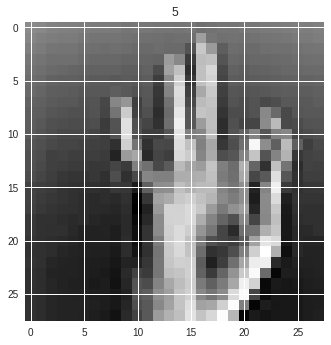

In [17]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [18]:
model.save_weights('model_weights.h5')
weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
weights_file.SetContentFile('model_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1RvY2_T0hQ-8fO7Rgj5C3FgoWkuCA-ICa'})

In [21]:
model.save('model.h5')
weights_file = drive.CreateFile({'title' : 'model.h5'})
weights_file.SetContentFile('model.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1Cs0mkCbgKFYgFYIr9JPgVq_iZb0V3psf'})

In [19]:
!pip install h5py pyyaml 